In [1]:
from torchvision import transforms,datasets
from torch.utils.data.dataset import Dataset
import torch

import PIL
import numpy as np
import h5py

import subprocess

In [2]:
class SFBD(Dataset):
    
    """
        A custom dataloader for Stanford Background Dataset.
        http://dags.stanford.edu/projects/scenedataset.html
        
        It works after some preprocessing of converting the regions map into one hot encoding\
        form in .h5py format
        
        Authors:
            Dibya Prakash Das
            Sangeet Kumar Mishra
            
    """
    
    def __init__(self,image_path,region_path,transform=None):
        
        """
            image_path : The location of the SBD's images
            region_path : The location of the individual one_hot_encodified ".h5" files
            transform : yet to be implemented
        """
        
        self.image_path = image_path
        self.region_path = region_path
        self.file_list =  subprocess.getoutput("ls "+image_path).split("\n")
        self.len_files = len(self.file_list)
        self.regions = subprocess.getoutput("ls "+region_path).split('\n')
        
    def load_h5py(self,file):
        
        """
            loads a '.h5' file of shape  into a numpy array and returns it. 
        """
        
        with h5py.File("{}{}".format(self.region_path,file),"r") as hf:
            loaded = hf["OHE"][:]
        return loaded
        

    
    def __len__(self):
        
        """
            returns the number of files
        """
        return self.len_files        
    
    def __getitem__(self,index):
        
        """
            gives an image and its all classes in one hot encoding form
        """
        
        region = SFBD.load_h5py(self,self.regions[index])
        image = PIL.Image.open(self.image_path + self.file_list[index])
        resized_image = np.array(image.resize((500,500),PIL.Image.NEAREST)).T
        image_tensor = torch.from_numpy(resized_image)
        region_tensor = torch.from_numpy(region)
        return {'image':image_tensor,'region':region_tensor}

In [3]:
#instatiate
sf = SFBD(image_path="./iccv09Data/images/",region_path="./h5py/")

In [10]:
# access an element by idex
sf[57]['image'].byte().numpy().shape

(3, 500, 500)

In [5]:
np.array(sf[56]['region'][0],dtype='uint8')*100

TypeError: int() argument must be a string, a bytes-like object or a number, not 'torch.DoubleTensor'

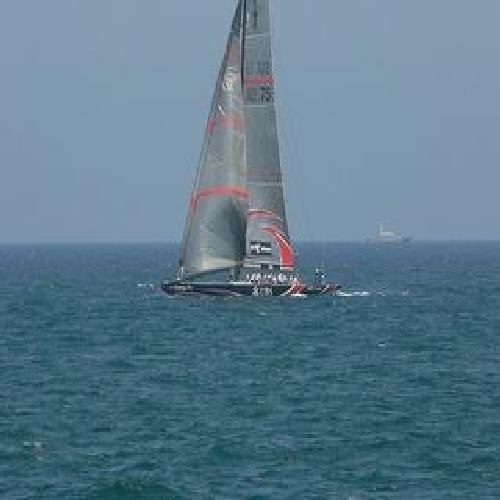

In [12]:
PIL.Image.fromarray(sf[45]['image'].numpy().T)  ### very very important feature

In [13]:
for i in range(8):
    PIL.Image.fromarray(np.array(sf[45]['region'].numpy()[i],dtype='uint8')*140).show()

In [8]:
len(sf)

560

In [9]:
sf.regions[0]

'h5py_0000047.regions.txt'

In [10]:
len(sf.regions)

560

In [35]:
sf[56]['region'][3]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [13]:
dataset_loader = torch.utils.data.DataLoader(sf,
                                             batch_size=1, shuffle=False,
                                             num_workers=1)

In [15]:
a=sf[4]

In [16]:
a

{'image': array([[[237, 241, 240],
         [238, 242, 241],
         [241, 245, 244],
         ..., 
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[241, 245, 244],
         [242, 246, 245],
         [245, 249, 248],
         ..., 
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[243, 245, 244],
         [243, 245, 244],
         [245, 247, 246],
         ..., 
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        ..., 
        [[ 73,  90, 106],
         [ 73,  90, 106],
         [ 74,  91, 107],
         ..., 
         [ 89, 111, 134],
         [ 87, 109, 132],
         [ 85, 107, 130]],
 
        [[ 73,  90, 106],
         [ 74,  91, 107],
         [ 74,  91, 107],
         ..., 
         [ 85, 107, 130],
         [ 84, 106, 129],
         [ 83, 105, 128]],
 
        [[ 69,  86, 102],
         [ 69,  86, 102],
         [ 70,  87, 103],
         ..., 
         [ 82,

In [15]:
type(a)

dict

In [17]:
a.keys()

dict_keys(['image', 'region'])

In [18]:
import pickle as pk

In [20]:
with open("a.d","wb") as f:
    pk.dump(a,f)